## 탐색적 데이터 분석
- **EDA(Exploratory Data Analysis)**
    - 데이터를 다양한 각도에서 관찰하고 이해하는 과정
    - 데이터를 본격적으로 분석하기 전에 그래프나 통계적인 방법으로 자료를 직관적으로 관찰
- 필요성
    - 데이터의 분포적 특성을 검토함으로써 데이터가 의미하는 현상 이해와 데이터에 대한 잠재적인 문제 발견 $\Rightarrow$ 본격 분석 전에 변수 설정, 데이터의 추가 수집 등 보완
    - 특잇값이 많거나, 표본이 불균형적이거나 등 준비 단계에서 많이 사용하던 기법
    - **시각적 분석을 통해 숨어있는 패턴 탐색** $\Rightarrow$ 데이터 과학에서는 오히려 탐색적 자료 분석이 강조
- 빅데이터에서는 `p-value`가 산출되는 분석보다 EDA를 선호한다.

## 영어 불용어 목록 stopword list
- `file명`의 format을 일정하게 구축하는 것도 중요하다.
- `stopword` 버전도 여러 가지가 있다.

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yunji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from nltk.corpus import stopwords
stop_list = stopwords.words('english')

In [4]:
len(stop_list)

198

In [5]:
stop_list[:7]

['a', 'about', 'above', 'after', 'again', 'against', 'ain']

In [6]:
stop_list[-5:]

["you're", 'yours', 'yourself', 'yourselves', "you've"]

## TDM 만들기

In [7]:
import os, re
from collections import Counter
import pandas as pd

TDM = {}
for i in sorted(os.listdir('./data/10_data')):
    if i.endswith('.txt'):
        words = re.sub(r'[(][\w\W]+?[)]', '', 
                        open('./data/10_data/' + i, encoding='utf-8').read().lower()).split()
        words = [re.sub(r'^\W+|\W+$', '', w) for w in words]
        words = [w for w in words if len(w) > 0 and not w in stop_list]
        TDM[i[:4]] = Counter(words)
df = pd.DataFrame(TDM).sort_index().fillna(0).astype('int')
df.index.name = 'Word'

- `sub`의 정규표현(`[(][\w\W]+?[)]`)은 지금은 딱히 필요하지 않다.
- `and not w in stop_list` 조건을 추가하여 stopword는 포함하지 않는다.
- `i[:4]`을 통해 취임연도만 추출한다.

In [8]:
df.iloc[100:105, [0, 1, 2, -3, -2, -1]]

,1789,1793,1797,2001,2005,2009
Word,,,,,,
absolute,0,0,0,0,0,0
absolutely,0,0,0,0,0,0
absorb,0,0,0,0,0,0
absorbed,0,0,0,0,0,0
absorbing,0,0,0,0,0,0


In [9]:
df.loc[df.index == 'absorb']

,1789,1793,1797,1801,1805,1809,1813,1817,1821,1825,1829,1833,1837,1841,1845,1849,1853,1857,1861,1865,1869,1873,1877,1881,1885,1889,1893,1897,1901,1905,1909,1913,1917,1921,1925,1929,1933,1937,1941,1945,1949,1953,1957,1961,1965,1969,1973,1977,1981,1985,1989,1993,1997,2001,2005,2009
Word,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
absorb,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


stopword를 제거하였기 때문에 아래 결과는 나오지 않는다.

In [10]:
df.loc[df.index == 'the']

,1789,1793,1797,1801,1805,1809,1813,1817,1821,1825,1829,1833,1837,1841,1845,1849,1853,1857,1861,1865,1869,1873,1877,1881,1885,1889,1893,1897,1901,1905,1909,1913,1917,1921,1925,1929,1933,1937,1941,1945,1949,1953,1957,1961,1965,1969,1973,1977,1981,1985,1989,1993,1997,2001,2005,2009
Word,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## 어휘 빈도 합계

In [11]:
df['Total'] = df.sum(1)

In [12]:
df.iloc[100:105, (df.shape[1] - 3):]

,2005,2009,Total
Word,,,
absolute,0,0,9
absolutely,0,0,3
absorb,0,0,1
absorbed,0,0,1
absorbing,0,0,1


## 어휘 빈도 합계 내림차순

In [13]:
df.sort_values(by='Total', ascending=False, inplace=True)

In [14]:
df.iloc[:7, [0, 1, 2, -3, -2, -1]]

,1789,1793,1797,2005,2009,Total
Word,,,,,,
government,8,1,16,1,3,557
people,4,1,20,6,7,553
us,1,0,2,3,23,455
upon,0,1,5,1,3,369
must,3,0,2,6,8,346
may,6,1,12,3,3,333
great,3,0,5,4,1,331


## 계층적 군집 분석
- 유사도/비유사도에 따라 군집으로 분류하고 그 결과를 계층구조로 분석 $\Leftrightarrow$ **hierarchical clustering**
### 군집 분석 절차
- 유사도 측정(예제는 과정 스킵)
    - 개체/범주 사이의 변수별 대응 관찰치를 비교
    - 개체/범주 사이의 관계를 거리/각도/상관계수 등으로 측정하여 유사도 거리표 산출
- 연결(linkage) 방법
    - 군집 사이의 유사성이 큰 것부터, 즉, 거리/각도 값이 작거나 상관계수가 큰 것부터 bottom-up 방식의 군집화(병합적 군집 분석)
    - 연결 방법에 따라 군집을 묶는 방식의 차이
## 계층 구조 형성 원리
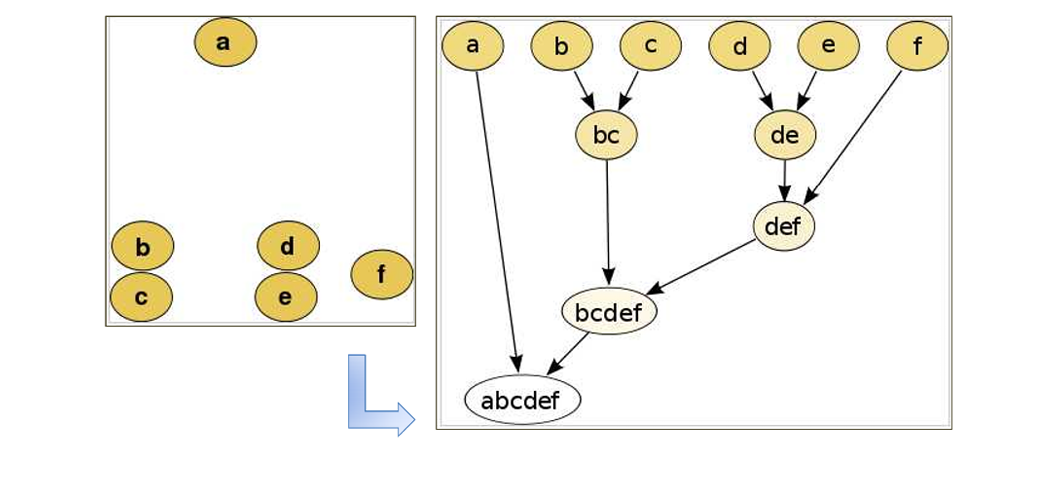

## 취임연도: 계층적 군집 분석

아래 코드를 활용하여 과제를 진행하면 된다.

Text(0, 0.5, 'Distance')

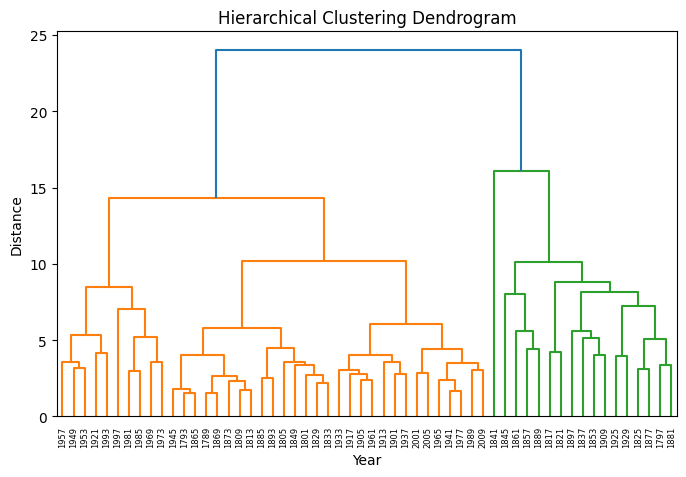

In [15]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

linked = linkage(StandardScaler().fit_transform(
    df.iloc[:20, :-1].T), method='ward')
plt.figure(figsize=(8, 5))
dendrogram(linked, orientation='top',
            labels=df.iloc[:20, :-1].T.index)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('Year')
plt.ylabel('Distance')

- 고빈도 어휘 20개만 활용하여 군집화를 진행했다.
- 녹색 그룹은 1800년대 중반이 대부분이다.
    - 시대별 어휘 사용 빈도가 비슷하다.
    - 주황색 그룹에 비해 유사성이 조금 떨어지는 부분이 있다.
- 주황색 그룹의 가장 오른쪽 그룹에 2000년대가 몰려 있다.
    - 취임 연설문의 고빈도 어휘에 흐름이 있다는 것을 알 수 있다.
    - 2, 3번째 그룹의 유사성이 더 높다.

## 고빈도 20개 어휘: 계층적 군집 분석

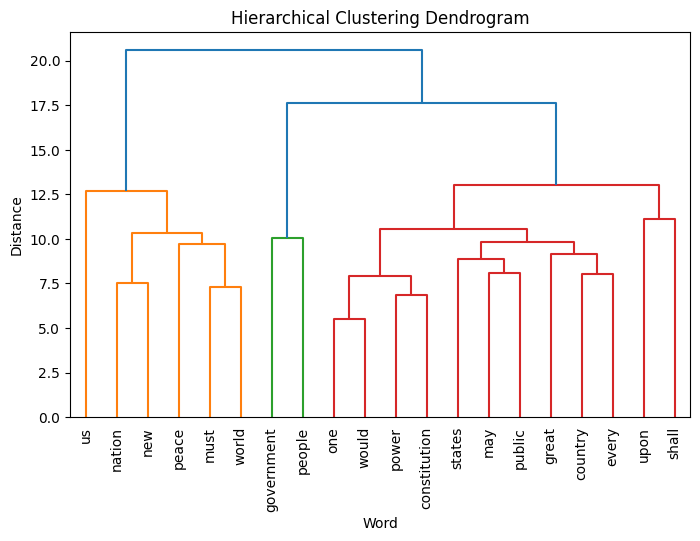

In [21]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

linked = linkage(StandardScaler().fit_transform(
    df.iloc[:20, :-1]), method='ward')
plt.figure(figsize=(8, 5))
dendrogram(linked, orientation='top',
            labels=df.iloc[:20, :-1].index)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('Word')
plt.ylabel('Distance')
plt.xticks(rotation=90, fontsize=10)
plt.show()

- 같은 군집에 포함된 단어 목록을 보면 'us'가 미국을 의미하는 us라는 것도 알 수 있다.
- `new, nation`, `peace, must, world`
- 이것만으로는 알 수 없으니 다른 탐색 기법을 더 적용해 보아야 한다.
- 빨간색: 미국 건국 초기

## 계층적 군집 분석의 단점
- 유사도 거리가 짧은 것끼리 군집을 먼저 생성하므로,
    - distance가 높은 곳에서 연결되는 군집은 무의미할 경우 발생
    - 일단 군집으로 분류되면 개별적인 유사도는 고려되기 어렵다.
- 행 따로, 열 따로 분석하므로 행 범주와 열 범주 사이의 관련성을 파악하기 어렵다.
- 유사도 거리 계산 방법, 연결 방법 선택의 문제
- 취임연도와 어휘를 분리해서 볼 수밖에 없는 한계를 지닌다.
- 그럼에도 불구하고 군집의 선이 명확하고, 계층적이다(사람들은 이런 것을 좋아한다).
- 밑에서 묶이는 게 아니면 큰 의미가 없을 수도 있다. 시각적 측면에서 주의할 것.
- 군집 내 유사도는 볼 수 있지만 군집 간 요소를 interactive하게 파악하기 어렵다.

## 대응 분석 correspondence analysis
- 지각도(perception map) 에서 공간적 좌표를 통해 공간적 방향과 근접성에 따라 상관성, 군집분석
- $3 \times 3$ 이상의 빈도 교차표, 즉, 행과 열로 구성되는 각 범주 간 절대빈도자료에서만 적용
- 시각적 분석 원리
    - 원점은 기대값, 원점에서 멀어질수록 관찰치와 기대값의 차이(잔차)가 크다.
    - 거리상 근접하는 범주 사이 상관성
    - $90$도 이내 양의 상관성
    - $180$도 음의 상관성
- 요소 사이의 관계를 볼 수 있다.